In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from boruta import BorutaPy
from joblib import dump, load
bitter_features = pd.read_csv('test.csv')

replaced_data_mean = bitter_features.iloc[:, 6:]

y = bitter_features['Bitter']

# Features
X = replaced_data_mean

C:\Users\singh\AppData\Local\Temp\ipykernel_5892\2039813025.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bitter_features = pd.read_csv('test.csv')


In [3]:
bitter_features

,Name,Taste,Reference,Canonical SMILES,In Bitter Domain,Bitter,MW,AMW,Sv,Se,...,"torsions_((C,3,1),(O,2,0),(C,3,1),(N,3,0))","torsions_((C,3,1),(C,3,1),(N,3,1),(O,1,0))","torsions_((C,3,1),(C,3,1),(C,4,0),(S,2,0))","torsions_((C,3,1),(C,3,1),(C,3,1),(S,2,0))","torsions_((C,3,1),(N,3,0),(C,3,1),(N,3,0))","torsions_((C,3,1),(N,3,0),(C,3,1),(O,2,0))","torsions_((C,3,1),(C,4,0),(S,2,0),(C,3,1))","torsions_((C,3,1),(C,3,1),(C,3,1),(C,2,2))","torsions_((C,4,0),(N,3,0),(C,3,1),(N,3,0))","torsions_((C,4,0),(N,3,0),(C,3,1),(N,3,1))"
0,D-Fructose,Non-bitter,Wiener et al. (2017) - Phyto-Dictionary,OC[C@@]1(O)OC[C@H]([C@H]([C@@H]1O)O)O,1.0,False,-1.389417,-0.322520,-1.471424,-1.186831,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
1,D-Glucose,Non-bitter,Wiener et al. (2017) - Phyto-Dictionary,OC[C@H]1O[C@H](O)[C@@H]([C@H]([C@@H]1O)O)O,1.0,False,-1.389417,-0.322520,-1.471424,-1.186831,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2,D-Mannose,Non-bitter,Wiener et al. (2017) - Phyto-Dictionary,OC[C@H]1O[C@H](O)[C@H]([C@H]([C@@H]1O)O)O,1.0,False,-1.389417,-0.322520,-1.471424,-1.186831,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
3,L-Rhamnose,Non-bitter,Wiener et al. (2017) - Phyto-Dictionary,O[C@H]1[C@H](C)O[C@@H]([C@@H]([C@@H]1O)O)O,1.0,False,-1.516426,-0.693118,-1.644854,-1.540127,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
4,D-Ribulose,Non-bitter,Wiener et al. (2017) - Phyto-Dictionary,OC[C@H]([C@H](C(=O)CO)O)O,1.0,False,-1.771542,-0.322520,-1.847285,-1.847285,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,Bitter,Wiener et al. (2017) - UNIMI,COc1c2OC[C@H](C(=O)c2c(c(c1OC)O)O)Cc1ccc(c(c1)O)O,1.0,True,0.361605,0.665263,0.192872,0.088585,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
167,NaN,Bitter,Wiener et al. (2017) - UNIMI,O=C(Nc1ccccc1C(=O)[O-])/C=C/c1ccc(cc1)O,1.0,True,-0.385320,0.760328,-0.369487,-0.499188,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
168,NaN,Bitter,Wiener et al. (2017) - UNIMI,COc1cc(/C=C/C(=O)Nc2ccccc2C(=O)[O-])ccc1OC,1.0,True,-0.088585,0.409254,0.029494,-0.044249,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
169,NaN,Bitter,Wiener et al. (2017) - UNIMI,O=C(Nc1ccccc1C(=O)[O-])/C=C/c1cccc(c1)O,1.0,True,-0.385320,0.760328,-0.369487,-0.499188,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338


In [4]:
import pickle
file = open('features/bitter/bitter_boruta.p','rb')

boruta = pickle.load(file)

In [5]:
len(boruta)

447

In [6]:
X_transformed = X.reindex(columns=boruta).values

In [7]:
len(X_transformed)

171

In [8]:
file = open('final_model/mean2.p','rb')
import pickle
best_model =pickle.load(file)

y_pred = best_model.predict(X_transformed)
y_pred_proba = best_model.predict_proba(X_transformed)[:, 1]
print("Bitter : ")
print(y_pred)
print(y_pred_proba)


Bitter : 
[False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
 False  True False  True  True  True  True  True  True  True  True  True
 False  True False False False  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True False False False  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False  True  True  True  True  True  True  True  True  True
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True Fals

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score,
    precision_score, recall_score, f1_score, average_precision_score
)
import numpy as np

# Model evaluation
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba)
aupr = average_precision_score(y, y_pred_proba)  # AUPR
sensitivity = recall  # Sensitivity (Sn) is the same as recall

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

# Calculate NER and Specificity
ner = fp / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero

# Print results
print("Accuracy:", accuracy)
print("Precision (P):", precision)
print("Recall (R):", recall)
print("Sensitivity (Sn):", sensitivity)
print("F1-score (F1):", f1)
print("ROC-AUC Score (AuROC):", roc_auc)
print("AUPR Score (AuPR):", aupr)
print("Non Error Rate (NER):", 1-ner)
print("Specificity (SP):", specificity)
print("Classification Report:\n", classification_report(y, y_pred))

Accuracy: 0.7719298245614035
Precision (P): 0.8666666666666667
Recall (R): 0.7428571428571429
Sensitivity (Sn): 0.7428571428571429
F1-score (F1): 0.8
ROC-AUC Score (AuROC): 0.8502164502164502
AUPR Score (AuPR): 0.9135434568606289
Non Error Rate (NER): 0.8181818181818181
Specificity (SP): 0.8181818181818182
Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.82      0.73        66
        True       0.87      0.74      0.80       105

    accuracy                           0.77       171
   macro avg       0.77      0.78      0.77       171
weighted avg       0.79      0.77      0.77       171



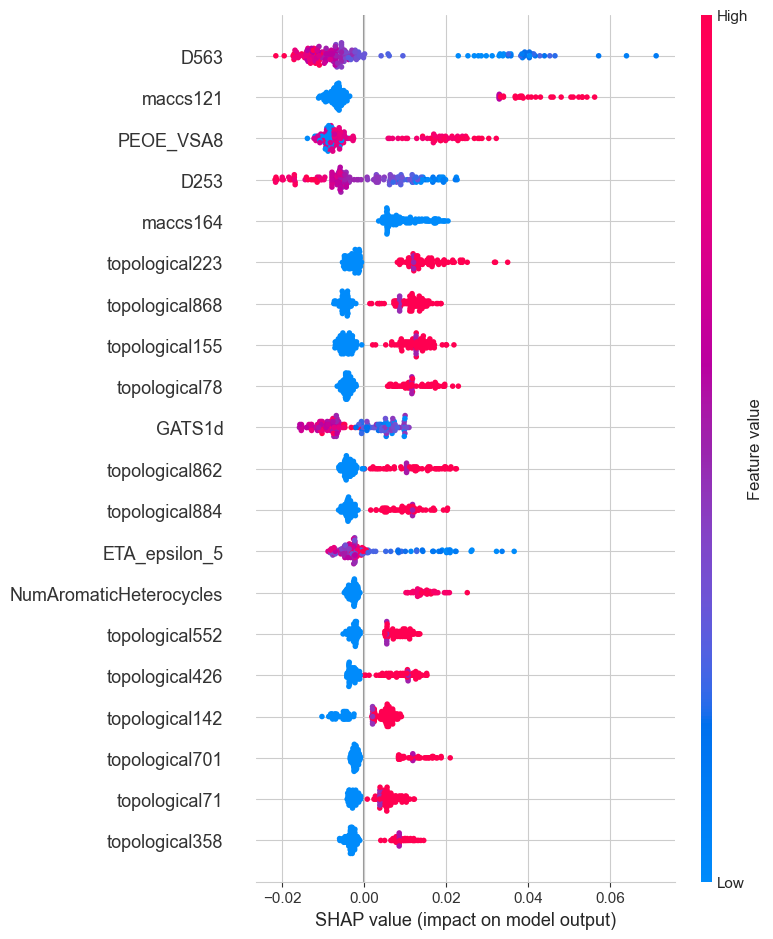

In [12]:
import shap

# Initialize the TreeExplainer for the best_model
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values for the test data
# For binary classifiers, shap_values is a list with two arrays: one for each class.
shap_values = explainer.shap_values(X_transformed)

# Plot SHAP summary for the positive class (index 1)
# Use the significant feature names for proper labeling in the plot.
shap.summary_plot(
    shap_values[1], 
    X_transformed, 
    feature_names=boruta, 
    plot_type="dot", 
    color_bar=True, 
    max_display=20  # Limit to top 20 features
)



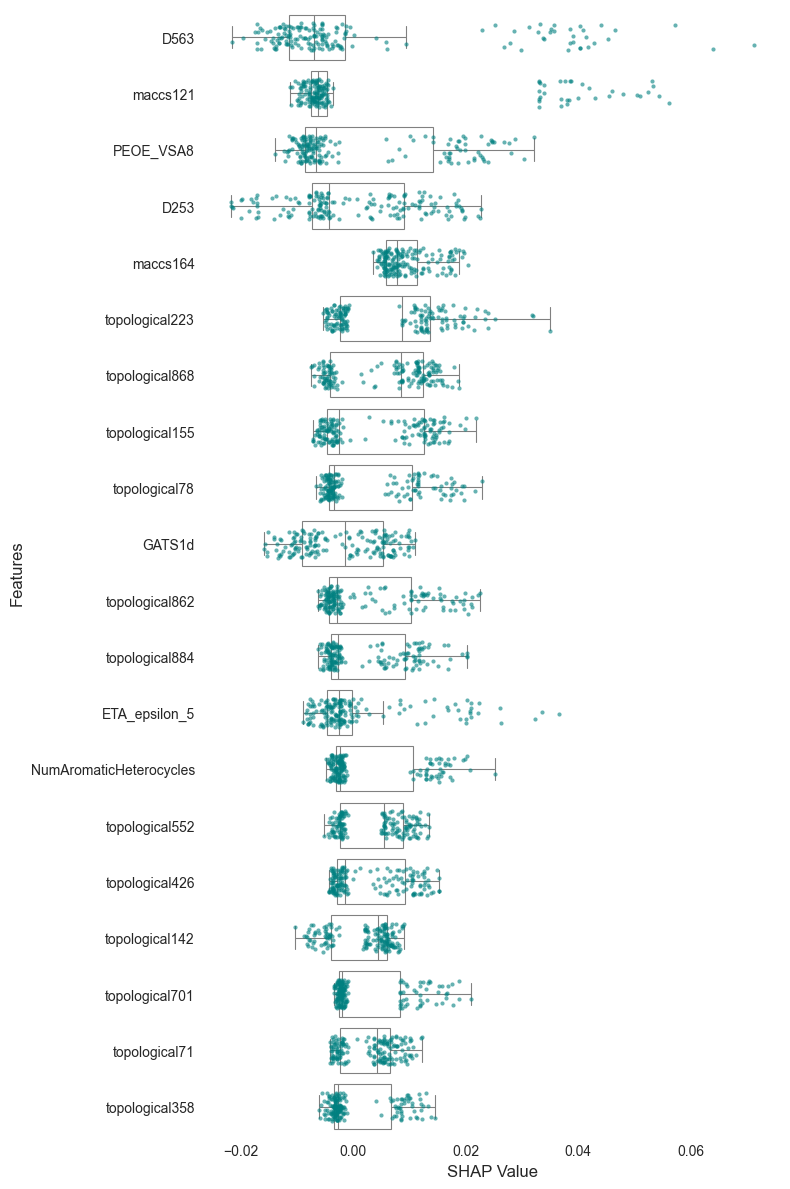

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# If shap_values is a list (common for classifiers), take the positive class
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap_array = shap_values[1]
else:
    shap_array = shap_values

# Convert to DataFrame
shap_df = pd.DataFrame(shap_array, columns=boruta)

# Compute mean absolute SHAP values (importance)
feature_importance = shap_df.abs().mean().sort_values(ascending=False)
# Make sure 'shap_df_topN' and 'top_N_features' are defined
N = 20  # You can adjust this to show fewer/more features
top_N_features = feature_importance.index[:N]
shap_df_topN = shap_df[top_N_features]

# Resize figure to prevent congestion
plt.figure(figsize=(8, 0.5 * N + 2))  # Dynamic height based on N

sns.set_style("whitegrid")

# Draw boxplot
sns.boxplot(
    data=shap_df_topN,
    orient='h',
    color='white',
    showfliers=False,
    linewidth=0.8,
    boxprops=dict(edgecolor='gray'),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray'),
    medianprops=dict(color='gray')
)

# Draw stripplot
sns.stripplot(
    data=shap_df_topN,
    orient='h',
    color='teal',
    alpha=0.6,
    jitter=0.25,
    size=3
)

# Format
plt.xlabel("SHAP Value", fontsize=12)
# plt.xlabel("SHAP Value (Median Importance)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
# plt.title(f"Top {N} Important Features (SHAP Analysis)", fontsize=14, weight='bold')
plt.grid(False)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()
